# DAT561 Final Project 

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the dataset here

Property_details = pd.read_csv("Property_details.csv")
Order_details = pd.read_csv("Order_details.csv", 
                            encoding = "ISO-8859-1",         # Use encoding to prevent error.
                            na_values = {'onsiteprice': 0})  # Define na_values in advance for 'onsiteprice' column for Q4.

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [3]:
# (1a)

# Use .nunique() to identify the number of unique properties in the region.
Property_details.loc[Property_details['zipcode'] == 84100]['propertyid'].nunique()

52

In [4]:
# (1b)

# Use .describe() for 'starrating', and then choose mean, standard deviataion, median, min, and max. (Here, 50% is median.)
Property_details.loc[Property_details['zipcode'] == 84100][['starrating']].describe().iloc[[1, 2, 5, 3, 7]].T

,mean,std,50%,min,max
starrating,2.846154,0.751068,3.0,2.0,4.0


## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [5]:
# (2a)

# Convert 'reservation date' column's dtype from object to datetime64 by using .to_datetime().
Order_details['reservation date'] = pd.to_datetime(Order_details['reservation date'])

# Create a new column 'weekday' by using .dt.day_name().
Order_details['weekday'] = Order_details['reservation date'].dt.day_name()

# Check the result.
Order_details[['reservation date', 'weekday']].head()

,reservation date,weekday
0,2019-11-02,Saturday
1,2019-11-30,Saturday
2,2019-12-20,Friday
3,2019-12-28,Saturday
4,2019-12-28,Saturday


In [6]:
# (2b)

# Use .value_count() to see which weekday receives the most reservations.
Order_details['weekday'].value_counts()

# Answer: 'Thursday' receives the most reservations among all weekdays.

Thursday     26589
Monday       26539
Tuesday      24275
Wednesday    24082
Sunday       23030
Friday       20784
Saturday     20574
Name: weekday, dtype: int64

## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [7]:
# 3(a) and 3(b)

# Create an empty dictionary named 'dict_amenities'.
dict_amenities = {}

# Fill 'dict_amenities' by using for-loops.
for i in range(Order_details.shape[0]):
    row_i = str(Order_details["roomamenities"][i]).lower().split(": ;")

    for item in row_i:
        if item in dict_amenities:
            dict_amenities[item] += 1
        else:
            dict_amenities[item] = 1
            
# Delete '' item from dict_amenities.
del dict_amenities['']

# Create a new dataframe called 'df_amenities' by using 'dict_amenities'.
df_amenities = pd.DataFrame(dict_amenities, index = ['count']).T

# Create a new column named 'percentage(%)'
df_amenities['percentage(%)'] = df_amenities['count'] / Order_details.shape[0] * 100

# The 10 Most Common Room Amenities
print('\n\n')
print("------------------------------------")
print("The 10 'Most' Common Room Amenities")
print("------------------------------------")
display(df_amenities.sort_values('count', ascending = False).head(10))

# The 10 Least Common Room Amenities
print('\n\n')
print("-------------------------------------")
print("The 10 'Least' Common Room Amenities")
print("-------------------------------------")
display(df_amenities.sort_values('count', ascending = False).tail(10))




------------------------------------
The 10 'Most' Common Room Amenities
------------------------------------


,count,percentage(%)
air conditioning,161054,97.094765
in-room safe box,161054,97.094765
free wi-fi in all rooms!,157613,95.020287
hair dryer,127316,76.755108
toiletries,119993,72.340284
heating,119196,71.859796
desk,114593,69.084782
telephone,113827,68.622983
closet,113368,68.346265
towels,106225,64.039958





-------------------------------------
The 10 'Least' Common Room Amenities
-------------------------------------


,count,percentage(%)
wi-fi [free],196,0.118163
in-room tablet,161,0.097062
air purifier,103,0.062096
first aid kit,98,0.059081
internet access ï¿?lan,72,0.043407
tv [in bathroom],58,0.034967
humidifier,45,0.027129
vending machine,24,0.014469
hot tub,13,0.007837
open air bath privileges,12,0.007234


## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [8]:
# 4(a)

# NOTE: We already defined na_values for 'onsiteprice' column when we read the csv file at the beginning
# by using 'na_values = {'onsiteprice': 0}'. 

# Create a new column 'replaced onsiteprice'.
Order_details['replaced onsiteprice'] = Order_details['onsiteprice']

# Fill na values in 'replaced onsiteprice' column by using groupby, apply, and lambda.
# This code computes the median onsiteprice for each proportycode.
Order_details['replaced onsiteprice'] = Order_details.groupby('propertycode')['replaced onsiteprice'].apply(lambda x: x.fillna(x.median()))

# Check the result.
Order_details.loc[Order_details['onsiteprice'].isnull()][['propertycode', 'onsiteprice', 'replaced onsiteprice']].head(10)

,propertycode,onsiteprice,replaced onsiteprice
60,1198059,NaN,100.320
77,1198059,NaN,100.320
134,6825,NaN,128.595
135,6825,NaN,128.595
158,517461,NaN,180.835
216,5943546,NaN,260.190
228,7975,NaN,897.530
274,7975,NaN,897.530
275,7975,NaN,897.530
276,7975,NaN,897.530


In [9]:
# 4(b)

# Create a new column 'Maximum' by using .transform(lambda x: x.max()).
Order_details['Maximum'] = Order_details.groupby('propertycode')['replaced onsiteprice'].transform(lambda x: x.max())

# Create a new column 'Minimum' by using .transform(lambda x: x.min()).
Order_details['Minimum'] = Order_details.groupby('propertycode')['replaced onsiteprice'].transform(lambda x: x.min())

# Create a new column 'Normalized Maximum'.
m_min = Order_details['Maximum'].min()  # Define the minimum of all 'Maximum' values.
m_max = Order_details['Maximum'].max()  # Define the maximum of all 'Maximum' values.
Order_details['Normalized Maximum'] = Order_details.groupby('propertycode')['Maximum'].transform(lambda x: (x - m_min) / (m_max - m_min))

# Check the result.
display(Order_details.groupby('propertycode')[['Maximum', 'Minimum', 'Normalized Maximum']].min().reset_index().head(10))

# Save to csv file.
df_mx_min_price = Order_details.groupby('propertycode')[['Maximum', 'Minimum', 'Normalized Maximum']].min().reset_index()
df_mx_min_price.to_csv("Mx_Min Price.csv", index = False)

,propertycode,Maximum,Minimum,Normalized Maximum
0,31,374.73,219.52,0.020083
1,56,149.51,73.46,0.007620
2,97,468.83,259.76,0.025290
3,138,321.84,169.66,0.017156
4,147,226.18,122.90,0.011863
5,150,115.08,98.20,0.005715
6,162,371.71,123.16,0.019916
7,287,189.88,75.10,0.009854
8,333,46.80,46.80,0.001937
9,378,951.90,235.16,0.052021


## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [10]:
# 5(a)

# From 'Property_details' dataframe, create a 'hotel_list' whose values are hotels' property ID's.
hotel_list = Property_details.loc[Property_details['propertytype'] == "Hotels"]['propertyid'].to_list()

# Define filtering conditions.
cond_1 = (Order_details['maxoccupancy'] >= 3)
cond_2 = (Order_details['closed'] == 'N')
cond_3 = (Order_details['hotelblock'] != 'Sold out')
cond_4 = (Order_details['propertycode'].isin(hotel_list))

# Apply the above conditions and find out the unique numbers of propertycode.
Order_details.loc[cond_1 & cond_2 & cond_3 & cond_4]['propertycode'].nunique()

3085

For Q.5(b), there are two versions of answer depending on how we define 'the maximum of “replaced onsiteprice”'.

If we define it using the 'Maximum' column that we created for Q.4(b), the answer is 1372.

In [11]:
# 5(b) - ver.1

# Define a new filtering condition by using the 'Maximum' column we created in 4(b).
cond_5 = (Order_details['Maximum'] <= 150)

# Apply all the conditions and find out the unique numbers of propertycode.
Order_details.loc[cond_1 & cond_2 & cond_3 & cond_4 & cond_5]['propertycode'].nunique()

1372

If we define 'the maximum of “replaced onsiteprice”' after groupby, the ansewr is 1453.

In [12]:
# 5(b) - ver.2

sum(Order_details.loc[cond_1 & cond_2 & cond_3 & cond_4].groupby('propertycode')["replaced onsiteprice"].max()<=150)

1453

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [13]:
# (a)
# Create a new column 'Average' in the 'Order_details' dataframe.
Order_details['Average'] = Order_details.groupby('propertycode')['replaced onsiteprice'].transform(lambda x: x.mean())

# Create a new dataframe 'merge_df' from 'Property_details' and 'Order_details' by using pd.merge.
merge_df = pd.merge(Property_details, Order_details,
                    left_on = 'propertyid', right_on = 'propertycode')

# In merge_df, retain useful columns only and remove duplicates.
columns = ['propertyid', 'propertyname', 'city', 'country', 'zipcode', 'address', 'Average']
merge_df = merge_df[columns].drop_duplicates(keep = 'first')

# Create a dictionary such that {country: the maximum value of the Average}.
max_average_dict = merge_df.groupby('country')['Average'].max().to_dict()

# Create an empty dataframe 'mostexpensive_df'.
mostexpensive_df = pd.DataFrame()

# Fill the 'mostexpensive_df' by using for-loops.
for key, value in max_average_dict.items():
    mostexpensive_df = pd.concat([mostexpensive_df, 
                                  merge_df.loc[(merge_df['country'] == key) & (merge_df['Average'] == value)]])

# Check the result.
print('\n\n')
print("---------------------------------------------")
print("For Each Country, The Most Expensive Property")
print("---------------------------------------------")
display(mostexpensive_df.reset_index(drop = True))




---------------------------------------------
For Each Country, The Most Expensive Property
---------------------------------------------


,propertyid,propertyname,city,country,zipcode,address,Average
0,130055,Superior Alpine Wellnesshotel Karwendel,Pertisau,Austria,6213.0,Nr. 54a,655.020000
1,49541,Hotel Roosendaelhof,Geel,Belgium,2440.0,Stationsstraat 50,403.902979
2,7503033,Aspen Golf and Ski Resort,Razlog,Bulgaria,2760.0,Betolovoto Aspen Golf,1072.850000
3,112561,Hotel Marmont - Adults Only,Split,Croatia,21000.0,Zadarska 13,920.066216
4,152681,Hilton Park Nicosia Hotel,Egkomi,Cyprus,NaN,"1 Achaion Street,",304.798466
5,367192,Hotel Bila Ruze,Strakonice,Czech Republic,38601.0,Palackeho Namesti 80,676.515714
6,6720996,The Square,Copenhagen,Denmark,NaN,Radhuspladsen 14,288.985946
7,2202,Radisson Blu Sky Hotel Tallinn,Tallinn,Estonia,10143.0,Ravala Street 3,200.326364
8,365601,HavsVidden Resort,Geta,Finland,22340.0,Havsviddsvagen 90,512.370000
9,442720,Hotel Astrid,Lourdes,France,65100.0,Place Merlasse,11367.060000


In [14]:
#(b) 

# Create a dictionary such that {country: the minimum value of the Average}.
min_average_dict = merge_df.groupby('country')['Average'].min().to_dict()

# Create an empty dataframe 'cheapest_df'.
cheapest_df = pd.DataFrame()

# Fill the 'cheapest_df' by using for-loops.
for key, value in min_average_dict.items():
    cheapest_df = pd.concat([cheapest_df, 
                             merge_df.loc[(merge_df['country'] == key) & (merge_df['Average'] == value)]])
    
# Check the result
print('\n\n')
print("---------------------------------------")
print("For Each Country, The Cheapest Property")
print("---------------------------------------")
display(cheapest_df.reset_index(drop = True))




---------------------------------------
For Each Country, The Cheapest Property
---------------------------------------


,propertyid,propertyname,city,country,zipcode,address,Average
0,6537481,Dolomitenhotel,Lienz,Austria,9900.0,2 Dolomitenstrasse,12.060000
1,174732,Hotel Royal Astrid,Aalst,Belgium,9300.0,Keizersplein 27,54.589286
2,449128,Family Hotel Natalis,Hisarya,Bulgaria,4180.0,20 Geo Milev Str.,18.826667
3,1177961,The Movie Hotel Zagreb,Zagreb,Croatia,10000.0,Savska cesta,41.282000
4,184567,Bellapais Monastery Village,Ozankoy,Cyprus,9944.0,Bellapais Yolu Girne,35.880769
5,390933,Hotel Praded Jesenik,Jesenik,Czech Republic,79001.0,Dukelska 178,14.800000
6,6629907,Zleep Hotel Aarhus Nord,Aarhus,Denmark,8200.0,Tangen 45,58.844000
7,7621602,ibis Tallinn Center,Tallinn,Estonia,10132.0,Juhkentali 28,84.365714
8,887106,Kempeleen Moottorimaja,Kempele,Finland,90440.0,Sohjanantie 3,51.378571
9,7600445,Studio Moncoeur,Le Blanc,France,36300.0,31 Rue du Docteur Fardeau,33.150000


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

**Question 1: How many reservations for hotels/properties are made for each country? (Which countries are most popular?)**

**Question 2: What are the average hotels/properties price of each country?**

**Question 3: What are the average star-rating of each country?**

**Question 4: What are the five most popular room types?**

**Question 5: Are higher-star hotels more likely to provide free breakfast?**


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(2, 363.6896551724138, 'Avg. = 313.7')

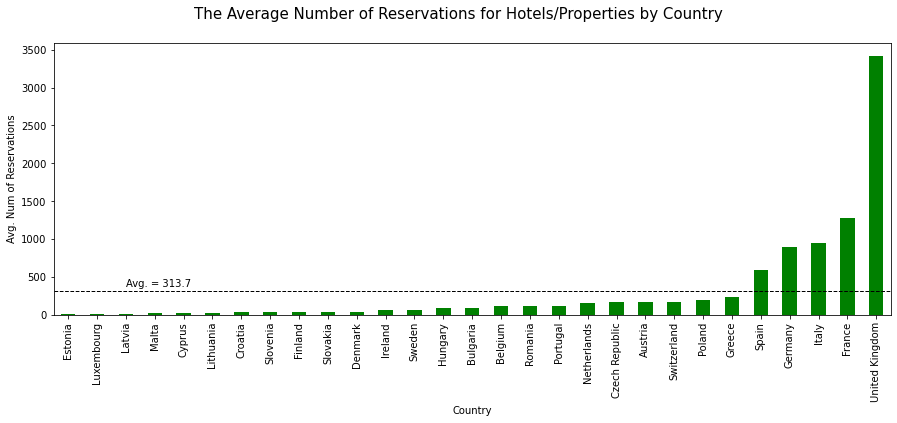

In [16]:
# Your code to answer Question 1
q1 = merge_df.groupby('country')['propertyid'].count().sort_values()

fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle("The Average Number of Reservations for Hotels/Properties by Country", size = 15)

q1.plot(kind = 'bar', x = 'country', color = 'green', ax = ax)
ax.set(xlabel = 'Country', ylabel = 'Avg. Num of Reservations')

ax.axhline(q1.mean(), color = 'black', linestyle = '--', linewidth = 1)
ax.annotate("Avg. = %.1f" %q1.mean(), xy = (2, q1.mean()+50))

# fig

Text(2, 126.55491892826863, 'Avg. = 121.6')

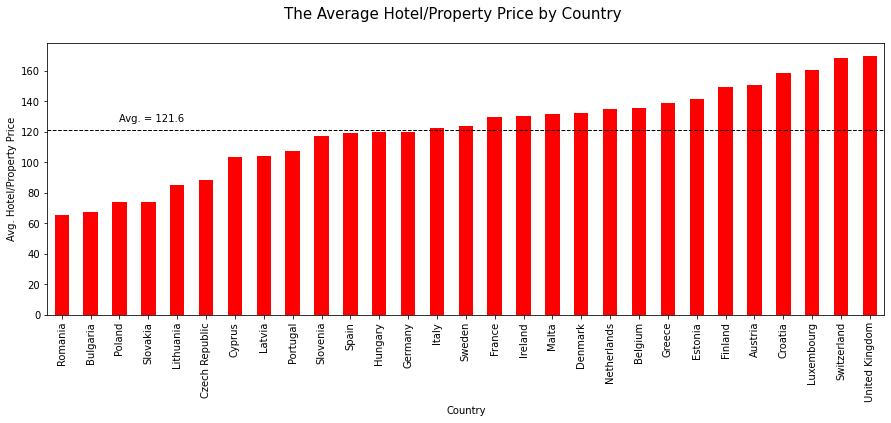

In [17]:
# Your code to answer Question 2

q2 = merge_df.groupby('country')['Average'].mean().sort_values()

fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle("The Average Hotel/Property Price by Country", size = 15)

q2.plot(kind = 'bar', x = 'country', color = 'red', ax = ax)
ax.set(xlabel = 'Country', ylabel = 'Avg. Hotel/Property Price')

ax.axhline(q2.mean(), color = 'black', linestyle = '--', linewidth = 1)
ax.annotate("Avg. = %.1f" %q2.mean(), xy = (2, q2.mean()+5))

# fig

Text(2, 3.545021931496219, 'Avg. = 3.5')

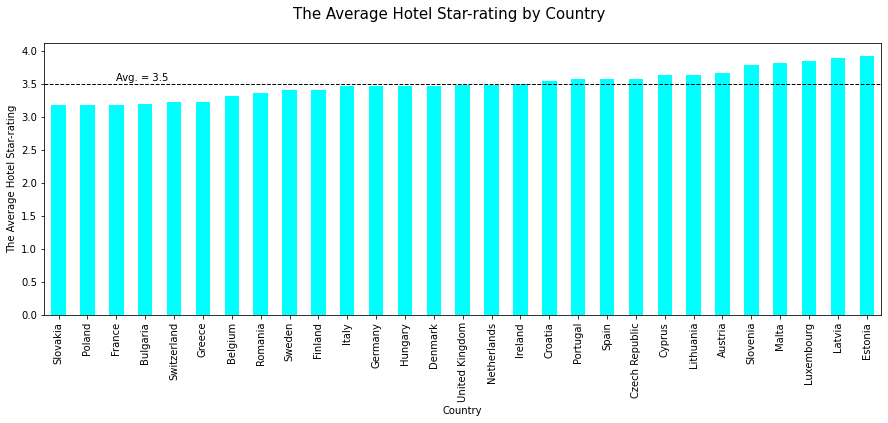

In [18]:
# Your code to answer Question 3

q3 = Property_details.merge(Order_details,how='inner',left_on='propertyid',right_on='propertycode')[['country', 'starrating']]
q3_answer = q3.groupby('country')['starrating'].mean().sort_values()

fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle("The Average Hotel Star-rating by Country", size = 15)

q3_answer.plot(kind = 'bar', color = 'cyan', ax = ax)
ax.set(xlabel = 'Country', ylabel = 'The Average Hotel Star-rating')

ax.axhline(q3_answer.mean(), color = 'black', linestyle = '--', linewidth = 1)
ax.annotate("Avg. = %.1f" %q3_answer.mean(), xy = (2, q3_answer.mean()+0.05))

# fig

Text(4, 5210.4, 'Avg. = 4960.4')

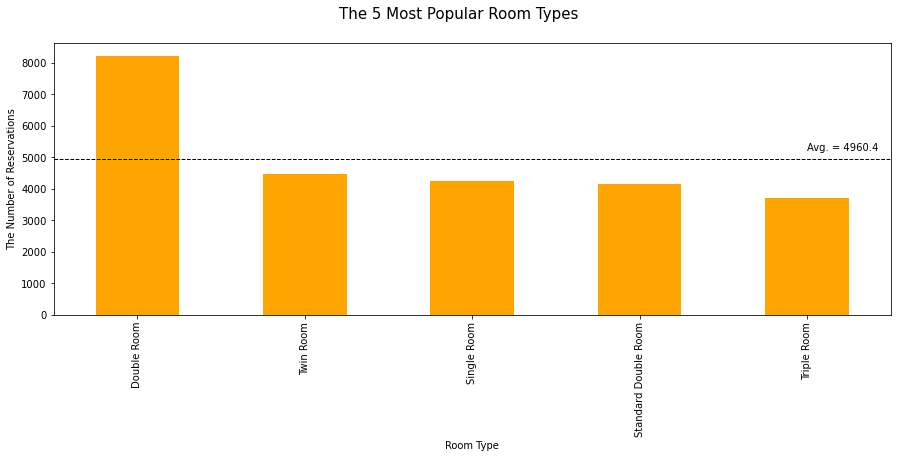

In [19]:
# Your code to answer Question 4

q4 = Order_details['roomtype'].value_counts().head()

fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle("The 5 Most Popular Room Types", size = 15)

q4.plot(kind = 'bar', color = 'orange', ax = ax)
ax.set(xlabel = 'Room Type', ylabel = 'The Number of Reservations')

ax.axhline(q4.mean(), color = 'black', linestyle = '--', linewidth = 1)
ax.annotate("Avg. = %.1f" %q4.mean(), xy = (4, q4.mean()+250))

# fig

Text(2, 0.5469966592818231, 'Avg. = 0.537')

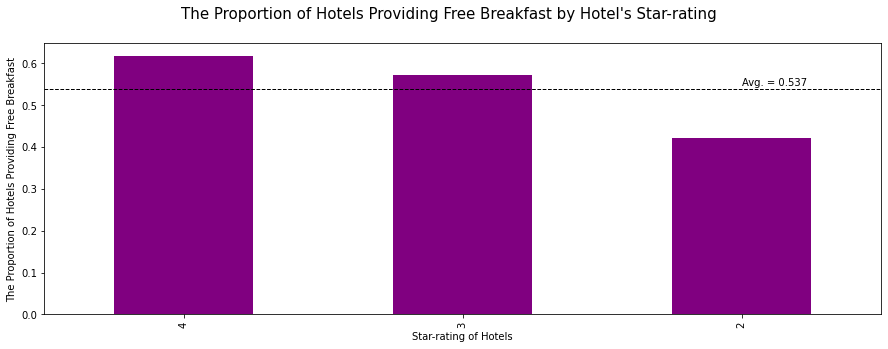

In [20]:
# Your code to answer Question 5

q5 = Property_details.merge(Order_details,how='inner',left_on='propertyid',right_on='propertycode')[['starrating', 'mealinclusiontype']]
q5_all = q5['starrating'].value_counts()

q5.dropna(inplace=True)
q5 = q5.loc[q5['mealinclusiontype'].str.lower().str.contains('free breakfast')]
q5_filter = q5['starrating'].value_counts()

q5_answer = q5_filter / q5_all
q5_answer

fig, ax = plt.subplots(figsize = (15, 5))
fig.suptitle("The Proportion of Hotels Providing Free Breakfast by Hotel's Star-rating", size = 15)

q5_answer.plot(kind = 'bar', color = 'purple', ax = ax)
ax.set(xlabel = 'Star-rating of Hotels', ylabel = 'The Proportion of Hotels Providing Free Breakfast')

ax.axhline(q5_answer.mean(), color = 'black', linestyle = '--', linewidth = 1)
ax.annotate("Avg. = %.3f" %q5_answer.mean(), xy = (2, q5_answer.mean()+0.01))

# fig

## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


We have put forward five questions and explored these issues from two perspectives.

In the first part (Q1~Q3), we analyze the problem with the country as a whole. For each country, we get total reservations, average hotel prices and the average star-rating. According to the total reservations result, we found that the United Kingdom has the most reservations, almost twice as many as second-placed France. And only the top five countries are above the average number of reservations and account for most of the overall reservations. About the average hotel price and star-rating, the UK still has the highest average price, occupying the first place and Estonia has the highest average star-rating which means that the average quality of the Estonia hotel is very high. Based on these data and conclusion, we can understand that the level of hotel consumption in the United Kingdom is relatively high. At the same time, the top five countries are very popular tourist countries which means that they are more people want to go to the UK temporarily without fixed residence and their hotel reservations are much higher than other countries.

In the second part (Q4~Q5), what we consider is the property of the hotel itself, concerning the room types and the relationship between hotel’s star-rating and free breakfast provision. From the figure we can see that when people go out, double rooms are the most booked. The reason may be that the double room is relatively large, and at the same time two people often travel together. At the same time, regarding whether to provide free breakfast, we can see that the higher the star rating, the greater the proportion of hotels that provide free breakfast. This means that the higher the star rating, the hotel customers have higher requirements for the stay experience, and the hotel provides the corresponding better service.


PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!